In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.append(os.path.abspath('../src'))
from tarp_plus_plus import tarp_plus_plus

# Linear Regression Experiment (Section 3.1)

In this experiment, we implement the forward model for linear regression and use it to define the posterior distribution. We then sample 100 points from the analytically defined posterior. Next, we apply TARP++ to analyze the posteriors in relation to their corresponding ground truths.

In [2]:
runs_probability = []
num_runs = 30
dim = 2
num_ground_truth = 10
num_models = 21

# Initialize arrays to store all m_truth and b_truth values
all_m_truths = np.zeros(num_ground_truth)
all_b_truths = np.zeros(num_ground_truth)
all_truths = np.zeros((10, dim))


for run in range(num_runs):
    # Truth is going to store the truth per each run
    truth = np.random.rand(num_ground_truth, dim)

    # Prob Matrix will store the probability with respect to each truth
    prob_matrix = np.random.rand(num_models, num_ground_truth, 100, dim)

    # Fill in truth with tuples from Gaussian Distribution
    for i in range(10):
        all_truths[i] = np.random.normal(0, 1, dim)  # Adjusted for 10 dimensions
    
    # Normalize all truth values
    truths_normalized = (all_truths - np.min(all_truths, axis=0)) / (np.max(all_truths, axis=0) - np.min(all_truths, axis=0))

    # Assign normalized values to truth array
    for i in range(10):
        truth[i] = truths_normalized[i]

    l_values = np.linspace(-5, 5, num_models)

    # Define the standard deviation values for the noise from 10 to 30 in logspace
    std_values = np.logspace(-40, -20, num_models) 

    for i in range(len(truth)):
        A = np.random.rand(100, dim)  # 100 data points, dim dimensions
        for j in range(len(l_values)):
            # Generate Gaussian noise with the current standard deviation
            n = np.random.normal(l_values[j], std_values[j], A.shape[0])            
            y = A @ truth[i] + n

            # Prior parameters
            mu_0 = np.zeros(dim)
            Sigma_0 = np.eye(dim)
            
            # Noise covariance matrix
            Sigma_n = std_values[j]**2 * np.eye(A.shape[0])
            
            # Compute the posterior covariance
            Sigma_post = np.linalg.inv(np.linalg.inv(Sigma_0) + A.T @ np.linalg.inv(Sigma_n) @ A)
            
            # Compute the posterior mean
            mu_post = Sigma_post @ (A.T @ np.linalg.inv(Sigma_n) @ y + np.linalg.inv(Sigma_0) @ mu_0)
            
            # Sample from the posterior
            samples = np.random.multivariate_normal(mu_post, Sigma_post, 100)
            
            # Store samples in the prob_matrix at index j, i
            prob_matrix[j, i] = samples

    probability = tarp_plus_plus(prob_matrix, truth, dim)

    runs_probability.append(probability)

After obtaining the results, we normalize the posteriors, compute the expectation values across setups with similar conditions, and plot the outcomes. The results show that the posterior with the least amount of noise is indeed the most accurate.

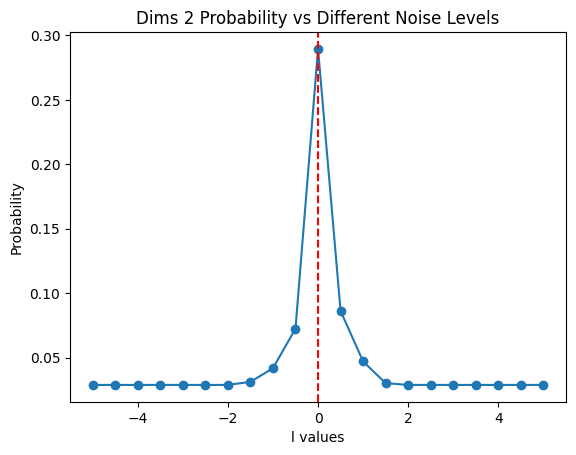

In [3]:
model_expectations = np.empty((num_runs, len(l_values)))
model_log_probabilities = np.empty((num_runs, len(l_values)))

for i in range(num_runs):
    model_probabilities = runs_probability[i]
    # Normalize model_probabilities: 
    model_probabilities = model_probabilities / np.sum(model_probabilities, axis = 0)
    # Model Probab is 21 x 1000, sum only row 0 

    # Calculate the expectation value, row wise
    model_expectations[i] = np.average(model_probabilities, axis=1)

# Average the model_expectations and model_log_probabilities
average_model_expectations = np.mean(model_expectations, axis=0)

# Plot the average model expectations
plt.figure()
plt.plot(l_values, average_model_expectations, 'o-')
# Plot vertical line at x = 0
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("l values")
plt.ylabel("Probability")
plt.title(f"Dims 2 Probability vs Different Noise Levels")
plt.show()

We repeat this experiment, extending the setup from the 2-dimensional case to 100 dimensions.

In [4]:
runs_probability = []
num_runs = 30
dim = 100
num_ground_truth = 10
num_models = 21

# Initialize arrays to store all m_truth and b_truth values
all_m_truths = np.zeros(num_ground_truth)
all_b_truths = np.zeros(num_ground_truth)
all_truths = all_truths = np.zeros((10, dim))


for run in range(num_runs):
    # probability = np.zeros((21, 10))
    # Truth is going to store the truth per each run
    truth = np.random.rand(num_ground_truth, dim)

    # Prob Matrix will store the probability with respect to each truth
    prob_matrix = np.random.rand(num_models, num_ground_truth, 100, dim)

    for i in range(10):
        all_truths[i] = np.random.normal(0, 1, dim)  # Adjusted for 10 dimensions
    
    # Normalize all truth values
    truths_normalized = (all_truths - np.min(all_truths, axis=0)) / (np.max(all_truths, axis=0) - np.min(all_truths, axis=0))
    
    # Assign normalized values to truth array
    for i in range(10):
        truth[i] = truths_normalized[i]

    l_values = np.linspace(-5, 5, num_models)

    # Define the standard deviation values for the noise from 10 to 30 in logspace
    std_values = np.logspace(-40, -20, num_models)  # Log-spaced values from 10 to 100

    for i in range(len(truth)):
        A = np.random.rand(100, dim)  # 100 data points, dim dimensions
        for j in range(len(l_values)):
            # Generate Gaussian noise with the current standard deviation
            n = np.random.normal(l_values[j], std_values[j], A.shape[0])            
            y = A @ truth[i] + n

            # Prior parameters
            mu_0 = np.zeros(dim)
            Sigma_0 = np.eye(dim)
            
            # Noise covariance matrix
            Sigma_n = std_values[j]**2 * np.eye(A.shape[0])
            
            # Compute the posterior covariance
            Sigma_post = np.linalg.inv(np.linalg.inv(Sigma_0) + A.T @ np.linalg.inv(Sigma_n) @ A)
            
            # Compute the posterior mean
            mu_post = Sigma_post @ (A.T @ np.linalg.inv(Sigma_n) @ y + np.linalg.inv(Sigma_0) @ mu_0)
            
            # Sample from the posterior
            samples = np.random.multivariate_normal(mu_post, Sigma_post, 100)
            
            # Store samples in the prob_matrix at index j, i
            prob_matrix[j, i] = samples

    probability = tarp_plus_plus(prob_matrix, truth, dim)

    runs_probability.append(probability)

After obtaining the results, we normalize the posteriors, compute the expectation values across setups with similar conditions, and plot the outcomes. The results show that the posterior with the least amount of noise is indeed the most accurate.

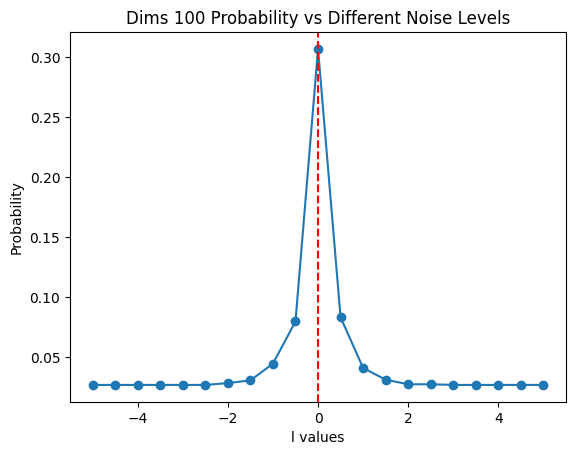

In [5]:
model_expectations = np.empty((num_runs, len(l_values)))
model_log_probabilities = np.empty((num_runs, len(l_values)))

for i in range(num_runs):
    model_probabilities = runs_probability[i]
    # Normalize model_probabilities: 
    model_probabilities = model_probabilities / np.sum(model_probabilities, axis = 0)
    # Model Probab is 21 x 1000, sum only row 0 

    # Calculate the expectation value, row wise
    model_expectations[i] = np.average(model_probabilities, axis=1)

# Average the model_expectations and model_log_probabilities
average_model_expectations = np.mean(model_expectations, axis=0)

# Plot the average model expectations
plt.figure()
plt.plot(l_values, average_model_expectations, 'o-')
# Plot vertical line at x = 0
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("l values")
plt.ylabel("Probability")
plt.title(f"Dims {dim} Probability vs Different Noise Levels")
plt.show()